In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = '/cosma7/data/dp004/dc-cues1/tng_dataframes/'
HALO_MASS_CUT = 1.e11

In [4]:
merge_df = pd.read_hdf(DATA_DIR + 'TNG300Dark_Hydro_MergerTree.hdf5')
dark_df = pd.read_hdf(DATA_DIR + 'TNG300dark_subfind.hdf5')
hdyro_df = pd.read_hdf(DATA_DIR + 'TNG300hydro_subfind.hdf5')

In [5]:
merge_df = merge_df.loc[merge_df['M200_HYDRO'] > HALO_MASS_CUT]

In [6]:
matched_df = pd.merge(merge_df, dark_df, on = ['ID_DMO'], how = 'inner')

In [7]:
full_df = pd.merge(matched_df, hdyro_df, on = ['ID_HYDRO'], how = 'inner',suffixes=('_dmo', '_hydro'))

In [8]:
def periodic_distance(df, boxsize: float) -> np.array:
    a = np.array([df['x_dmo'], df['y_dmo'], df['z_dmo']])
    b = np.array([df['x_hydro'], df['y_hydro'], df['z_hydro']])
s
    bounds = boxsize * np.ones(3)
    min_dists = np.min(np.dstack(((a - b) % bounds, (b - a) % bounds)), axis=2)
    dists = np.sqrt(np.sum(min_dists ** 2, axis=1))
    return dists[0]

IndentationError: unexpected indent (<ipython-input-8-d540db2f8d87>, line 5)

In [ ]:
full_df['displacement'] = full_df.apply(lambda x: periodic_distance(x, 300.), axis=1)


In [ ]:
one2one = full_df.drop_duplicates(subset='ID_DMO')


In [ ]:
len(one2one)

In [ ]:
plt.hist(full_df['displacement'], log=True,alpha=0.3, label='1-Many')
plt.hist(one2one['displacement'], log=True, alpha=0.3, label='1-1')
plt.xlabel('Displacement DMO to HYDRO')
plt.ylabel('Number of halos')
plt.legend()

# Stellar Mass after thresholding

In [11]:
df_1 = pd.read_hdf(DATA_DIR + 'merged_dataframe_v2_threshold_1.h5')
df_4 = pd.read_hdf(DATA_DIR + 'merged_dataframe_v2_threshold_4.h5')


In [12]:
df_1.columns

Index(['ID_DMO', 'm2500c', 'vrms_2500c', 'vrms_std_2500c', 'beta2500c',
       'concentration_prada', 'concentration_nfw', 'rho_s', 'chisq_nfw',
       'vrms_200c', 'vrms_std_200c', 'beta200c', 'N_subhalos',
       'Group_R_Crit200', 'VelDisp', 'Vmax', 'Spin', 'fsub_unbound',
       'x_offset', 'HalfmassRad', 'MassInMaxRad', 'env_5', 'env_10', 'x_dmo',
       'y_dmo', 'z_dmo', 'ID_HYDRO', 'M200_DMO', 'M200_HYDRO',
       'Formation Time', 'Nmergers', 'MassPeak', 'vpeak', 'total_M_stars',
       'x_hydro', 'y_hydro', 'z_hydro', 'displacement', 'N_gals',
       'M_stars_central'],
      dtype='object')

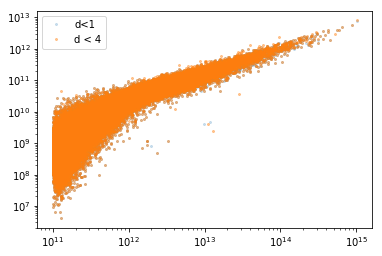

In [10]:
#.loglog(full_df.M200_DMO, full_df.M_stars_central,
#          linestyle='', marker='o', markersize=2)
plt.loglog(df_1.M200_DMO, df_1.M_stars_central,
          linestyle='', marker='o', markersize=2,
           alpha=0.2, label = 'd<1')
plt.loglog(df_4.M200_DMO, df_4.M_stars_central,
          linestyle='', marker='o', markersize=2, 
           alpha=0.4, label='d < 4')
plt.legend()